In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the trading data
trade = pd.read_csv('NCCU_SEC_PROFIT.csv')
trade

,TRADE_DATE,ACCT_KEY,GENDER_CODE,AGE,JOB_DESC,STOCK_ID,BUY_SELL,TXN_AMOUNT,TXN_STOCKS,PROFIT
0,2021/1/4,B,2,1,Y,2884,B,25000,1000,0
1,2021/2/28,E,1,4,X,2330,S,6000000,10000,4173
2,2021/1/13,E,1,4,X,6208,B,500000,5000,0
3,2021/2/14,E,1,4,X,56,S,210000,7000,3055
4,2021/2/12,A,1,1,X,50,B,1300000,10000,0
5,2021/1/6,C,2,2,Y,2884,B,250000,10000,0
6,2021/2/15,D,1,3,Z,2308,S,750000,5000,-1168
7,2021/2/1,E,1,4,X,50,S,650000,5000,-8737
8,2021/1/18,A,1,1,X,2330,B,3000000,5000,0
9,2021/2/27,C,2,2,Y,56,B,210000,7000,0


In [3]:
# read the inventory data
inventory = pd.read_csv('NCCU_SEC_MARKET_VALUE.csv')
inventory

,DATA_DATE,ACCT_KEY,STOCK_CODE,PERCENTAGE,BETA_21,BETA_65,BETA_250
0,2020/11/5,A,2884,1.00,0.95,0.930000,0.900000
1,2020/12/5,B,2330,1.00,1.12,1.100000,1.100000
2,2020/12/5,E,9958,1.00,1.30,1.190000,1.100000
3,2021/1/5,A,50,0.23,1.00,1.000000,0.968888
4,2021/1/5,A,2330,0.77,1.50,1.500000,1.565240
5,2021/1/5,B,6208,1.00,0.98,0.988215,0.988215
6,2021/1/5,C,2884,1.00,0.90,0.934225,0.922911
7,2021/1/5,D,56,0.43,0.94,0.940000,0.940000
8,2021/1/5,D,50,0.57,1.00,1.000000,0.968888
9,2021/1/5,E,2308,0.15,1.30,1.335264,1.268456


In [4]:
# Data Duration
print('(Trade)Begin: ', min(trade['TRADE_DATE']),'End: ', max(trade['TRADE_DATE']))
print('(Inventory)Begin: ', min(inventory['DATA_DATE']),'End: ', max(inventory['DATA_DATE']))

(Trade)Begin:  2020/11/18 End:  2021/2/8
(Inventory)Begin:  2020/11/5 End:  2021/2/5


In [5]:
# Numbers of sample
print('(Trade)Numbers of users: ', trade['ACCT_KEY'].nunique())
print('(Inventory)Numbers of users: ', inventory['ACCT_KEY'].nunique())

(Trade)Numbers of users:  5
(Inventory)Numbers of users:  5


In [6]:
# Characteristics
samples = pd.DataFrame({'ACCT_KEY':trade['ACCT_KEY'].unique()})
trait = trade[['ACCT_KEY','GENDER_CODE','AGE','JOB_DESC']]
samples = pd.merge(samples, trait, how='left',on='ACCT_KEY')
samples = samples.drop_duplicates(subset=['ACCT_KEY']).sort_values(by='ACCT_KEY')
samples = samples.set_index('ACCT_KEY')
samples

,GENDER_CODE,AGE,JOB_DESC
ACCT_KEY,,,
A,1,1,X
B,2,1,Y
C,2,2,Y
D,1,3,Z
E,1,4,X


In [7]:
samples.to_csv('samples_trait.csv')

In [8]:
# Gender Counts
male = samples[samples.GENDER_CODE==1]
female = samples[samples.GENDER_CODE==2]
print('Male: ',male['GENDER_CODE'].count())
print('Female: ', female['GENDER_CODE'].count())

Male:  3
Female:  2


In [9]:
# List of jobs and their population
jobs = trade[['ACCT_KEY','JOB_DESC']]
jobs = jobs.drop_duplicates(subset=['ACCT_KEY']).sort_values(by='ACCT_KEY')
jobs = jobs.groupby('JOB_DESC').count()
jobs

,ACCT_KEY
JOB_DESC,
X,2
Y,2
Z,1


In [10]:
jobs = pd.DataFrame({'JOB_DESC':samples['JOB_DESC'].unique()})
for each in jobs['JOB_DESC']:
    cnt = samples[samples.JOB_DESC==each]['JOB_DESC'].count()
    print(each, cnt)

X 2
Y 2
Z 1


In [11]:
# Total numbers of trading record
counts = trade.count()['TRADE_DATE']
print('Total numbers of trading record: ', counts)

Total numbers of trading record:  22


In [12]:
# Buy/Secll Counts
buy_counts = trade[trade.BUY_SELL=='B'].count()['TRADE_DATE']
sell_counts = trade[trade.BUY_SELL=='S'].count()['TRADE_DATE']
print('Buys: ',buy_counts,'Sells: ',sell_counts)

Buys:  12 Sells:  10


In [13]:
b_freq = pd.DataFrame(trade[trade.BUY_SELL=='B'].groupby('ACCT_KEY').count()['TRADE_DATE'])
b_freq = b_freq.rename({'TRADE_DATE':'B_FREQ'}, axis='columns')
b_freq

,B_FREQ
ACCT_KEY,
A,2
B,3
C,4
D,1
E,2


In [14]:
s_freq = pd.DataFrame(trade[trade.BUY_SELL=='S'].groupby('ACCT_KEY').count()['TRADE_DATE'])
s_freq = s_freq.rename({'TRADE_DATE':'S_FREQ'}, axis='columns')
s_freq

,S_FREQ
ACCT_KEY,
A,3
B,1
D,2
E,4


In [15]:
# Trading frequency
freq = pd.DataFrame(trade.groupby('ACCT_KEY').count()['TRADE_DATE'])
freq = freq.rename({'TRADE_DATE':'T_FREQ'}, axis='columns')
freq = pd.merge(freq,b_freq,how='left',on='ACCT_KEY')
freq = pd.merge(freq,s_freq,how='left',on='ACCT_KEY')
freq = freq.fillna(0)
freq

,T_FREQ,B_FREQ,S_FREQ
ACCT_KEY,,,
A,5,2,3.0
B,4,3,1.0
C,4,4,0.0
D,3,1,2.0
E,6,2,4.0


In [16]:
# Duration(in Monthes) of the account

from datetime import datetime
date_format = "%Y/%m/%d"

beg = pd.DataFrame(inventory.groupby('ACCT_KEY').min()['DATA_DATE'])
beg = beg.rename({'DATA_DATE':'BEGIN'}, axis='columns')
latest = pd.DataFrame(inventory.groupby('ACCT_KEY').max()['DATA_DATE'])
latest = latest.rename({'DATA_DATE':'LATEST'}, axis='columns')
duration = pd.merge(beg,latest,how='left',on='ACCT_KEY')
duration['DURATION'] = 0
duration

,BEGIN,LATEST,DURATION
ACCT_KEY,,,
A,2020/11/5,2021/2/5,0
B,2020/12/5,2021/2/5,0
C,2021/1/5,2021/2/5,0
D,2021/1/5,2021/2/5,0
E,2020/12/5,2021/2/5,0


In [17]:
from datetime import datetime
date_format = "%Y/%m/%d"

for each in duration.index:
    beg = datetime.strptime(duration['BEGIN'][each], date_format)
    latest = datetime.strptime(duration['LATEST'][each], date_format)
    duration.at[each, 'DURATION'] = np.floor((latest - beg).days/30)

duration

,BEGIN,LATEST,DURATION
ACCT_KEY,,,
A,2020/11/5,2021/2/5,3
B,2020/12/5,2021/2/5,2
C,2021/1/5,2021/2/5,1
D,2021/1/5,2021/2/5,1
E,2020/12/5,2021/2/5,2


In [18]:
# Sum of profit/loss and TXN_AMOUNT
profit = trade.groupby('ACCT_KEY').sum()[['TXN_AMOUNT','PROFIT']]
profit = pd.DataFrame(profit)
profit

,TXN_AMOUNT,PROFIT
ACCT_KEY,,
A,6215000,-1393
B,4915000,9014
C,1395000,0
D,1880000,-8425
E,8260000,-35


In [19]:
FxP = pd.merge(freq, profit, on='ACCT_KEY')
FxP = pd.merge(samples, FxP, on='ACCT_KEY')
FxP = pd.merge(duration, FxP, on='ACCT_KEY')
FxP

,BEGIN,LATEST,DURATION,GENDER_CODE,AGE,JOB_DESC,T_FREQ,B_FREQ,S_FREQ,TXN_AMOUNT,PROFIT
ACCT_KEY,,,,,,,,,,,
A,2020/11/5,2021/2/5,3,1,1,X,5,2,3.0,6215000,-1393
B,2020/12/5,2021/2/5,2,2,1,Y,4,3,1.0,4915000,9014
C,2021/1/5,2021/2/5,1,2,2,Y,4,4,0.0,1395000,0
D,2021/1/5,2021/2/5,1,1,3,Z,3,1,2.0,1880000,-8425
E,2020/12/5,2021/2/5,2,1,4,X,6,2,4.0,8260000,-35


In [20]:
# Weighted Beta
inventory['P_BETA21'] = inventory['PERCENTAGE'] * inventory['BETA_21']
inventory['P_BETA65'] = inventory['PERCENTAGE'] * inventory['BETA_65']
inventory['P_BETA250'] = inventory['PERCENTAGE'] * inventory['BETA_250']
inventory

,DATA_DATE,ACCT_KEY,STOCK_CODE,PERCENTAGE,BETA_21,BETA_65,BETA_250,P_BETA21,P_BETA65,P_BETA250
0,2020/11/5,A,2884,1.00,0.95,0.930000,0.900000,0.9500,0.930000,0.900000
1,2020/12/5,B,2330,1.00,1.12,1.100000,1.100000,1.1200,1.100000,1.100000
2,2020/12/5,E,9958,1.00,1.30,1.190000,1.100000,1.3000,1.190000,1.100000
3,2021/1/5,A,50,0.23,1.00,1.000000,0.968888,0.2300,0.230000,0.222844
4,2021/1/5,A,2330,0.77,1.50,1.500000,1.565240,1.1550,1.155000,1.205235
5,2021/1/5,B,6208,1.00,0.98,0.988215,0.988215,0.9800,0.988215,0.988215
6,2021/1/5,C,2884,1.00,0.90,0.934225,0.922911,0.9000,0.934225,0.922911
7,2021/1/5,D,56,0.43,0.94,0.940000,0.940000,0.4042,0.404200,0.404200
8,2021/1/5,D,50,0.57,1.00,1.000000,0.968888,0.5700,0.570000,0.552266
9,2021/1/5,E,2308,0.15,1.30,1.335264,1.268456,0.1950,0.200290,0.190268


In [21]:
# Portfolio Beta for each record
beta = inventory.groupby(['DATA_DATE','ACCT_KEY']).sum()[['P_BETA21','P_BETA65','P_BETA250']]
beta

P_BETA21  P_BETA65  P_BETA250
DATA_DATE ACCT_KEY                               
2020/11/5 A           0.9500  0.930000   0.900000
2020/12/5 B           1.1200  1.100000   1.100000
          E           1.3000  1.190000   1.100000
2021/1/5  A           1.3850  1.385000   1.428079
          B           0.9800  0.988215   0.988215
          C           0.9000  0.934225   0.922911
          D           0.9742  0.974200   0.956466
          E           1.2580  1.275693   1.295683
2021/2/5  A           1.3812  1.370000   1.410188
          B           1.0000  0.988215   0.988215
          C           0.9100  0.934225   0.922911
          D           1.0400  0.976000   0.957333
          E           1.0900  1.092330   1.072287

In [22]:
# Mean portfolio beta for each user
mean_beta = beta.groupby('ACCT_KEY').mean()[['P_BETA21','P_BETA65','P_BETA250']]
mean_beta

,P_BETA21,P_BETA65,P_BETA250
ACCT_KEY,,,
A,1.238733,1.228333,1.246089
B,1.033333,1.025477,1.025477
C,0.905000,0.934225,0.922911
D,1.007100,0.975100,0.956899
E,1.216000,1.186008,1.155990


In [23]:
FxBxP = pd.merge(FxP, mean_beta, on='ACCT_KEY')
FxBxP

,BEGIN,LATEST,DURATION,GENDER_CODE,AGE,JOB_DESC,T_FREQ,B_FREQ,S_FREQ,TXN_AMOUNT,PROFIT,P_BETA21,P_BETA65,P_BETA250
ACCT_KEY,,,,,,,,,,,,,,
A,2020/11/5,2021/2/5,3,1,1,X,5,2,3.0,6215000,-1393,1.238733,1.228333,1.246089
B,2020/12/5,2021/2/5,2,2,1,Y,4,3,1.0,4915000,9014,1.033333,1.025477,1.025477
C,2021/1/5,2021/2/5,1,2,2,Y,4,4,0.0,1395000,0,0.905000,0.934225,0.922911
D,2021/1/5,2021/2/5,1,1,3,Z,3,1,2.0,1880000,-8425,1.007100,0.975100,0.956899
E,2020/12/5,2021/2/5,2,1,4,X,6,2,4.0,8260000,-35,1.216000,1.186008,1.155990


In [24]:
FxBxP.to_csv('Trading_Inventory_Summary.csv')

[Text(0.5, 1.0, 'PROFIT Histogram'), Text(0, 0.5, 'PROFIT')]

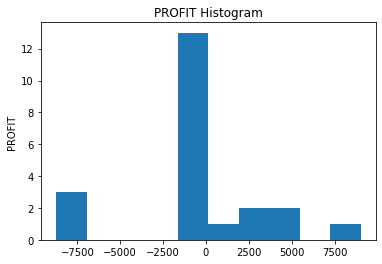

In [25]:
# Histogram for the profit of each transaction
x = trade['PROFIT']
plt.hist(x, bins=10)
plt.gca().set(title='PROFIT Histogram', ylabel='PROFIT')

<AxesSubplot:ylabel='Density'>

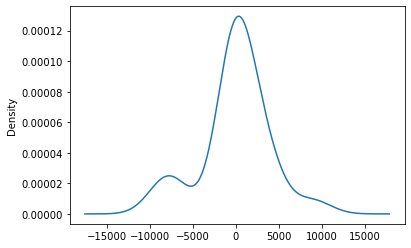

In [26]:
trade['PROFIT'].plot.kde()

array([<AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

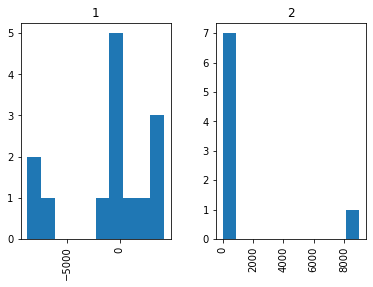

In [27]:
# Histogram for the profit of each transaction by different gender
trade['PROFIT'].hist(by=trade['GENDER_CODE'])

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>],
       [<AxesSubplot:title={'center':'Z'}>, <AxesSubplot:>]], dtype=object)

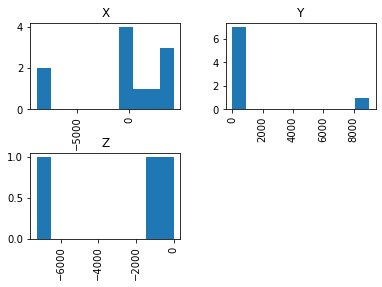

In [28]:
# Histogram for the profit of each transaction by different job
trade['PROFIT'].hist(by=trade['JOB_DESC'])